<a href="https://colab.research.google.com/github/rohansiddam/Python-Journey/blob/main/104%20-%20Lesson%20104%20(Polynomial%20Regression%20-%20Underfitting).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 104: Polynomial Regression - Underfitting

### Teacher-Student Activities

In this class, you will understand the use of polynomials in Machine learning. You will learn to create Polynomial Regression Model and explore the Underfitting and Overfitting scenarios in polynomial regression model.

---

####Activity 1: Underfitting

In the supervised machine learning algorithms, models are evaluated based on learning the trends for the training data to predict the target function for the seen and unseen data.

Generalisation refers to how well the model is trained to predict or classify the target for the unseen data.

The techniques to evaluate how well our machine learning model learns and generalises to the new data are known as **underfitting** and **overfitting**.


Let's start with underfitting. For example, go back to the items produced vs workers example mentioned in the previous lesson.


|No. of Workers|Items Produced|
|-|-|
|1|400|
|2|700|
|3|900|
|4|1000|
|5|1050|
|6|1075|

The relationship between the items produced (dependent variable) and number of workers (independent variable) looks like this:

<center><img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/underfitting.png'></center>



The above graph clearly indicates that even the best fit linear regression line is not able to trace the pattern of the data. That means a linear regression model is not suitable for this kind of data. This situation is known as **Underfitting**.

Underfitting is a scenario where the model is not complex enough to generalise the pattern between the training data points to calculate the target. This result in inaccurate predictions.

Underfitting is easy to detect. Let's create some data and train an ML model to examine underfitting on it.
Underfitting is easy to detect. Let's create some data and train an ML model to examine underfitting on it.

**Note:** For understanding underfitting and overfitting, we will intentionally use a 4-degree polynomial function to create a dummy dataset. However, the actual datasets may not possess polynomial relationship among its variables.

Perform the following tasks to generate a noisy and distorted signal:

1. Use `np.random.seed()` function so that we can obtain same random numbers on multiple executions of the code.

  **Syntax:** `numpy.random.seed(seed_value)` where `seed_value` is an integer for which the random numbers are generated.

2. Define an `X` array having values between `0` and `5` such that the difference between two consecutive values is `0.01`.

3. Define another array `y` whose values are calculated using following polynomial function:

  $$y = f(X) = 0.5X^4 + 2X^3 - 4 X^2 - X - 50$$

  We have arbitrarily chosen this polynomial function. You could choose any other arbitrary polynomial function.
  
4. Define an array `noise` having random numbers equal to the length of `X` array. Generate these random numbers using `numpy.random.randn()` function  and  then multiply them by `50` to add some distortion to the signal.  
  
  The `numpy.random.randn()` function creates an array of specified shape and fills it with random values as per standard normal distribution.

  **Syntax:** `numpy.random.randn(shape)`

  where, `shape` is the shape of the original array for which noisy signal is to be generated.

4. Add the original `y` array and `noise` array to get a noisy and distorted signal as follows:

    `y = y + noise`


5. Create a scatter plot between `X` and `y` arrays to visualise their relation.


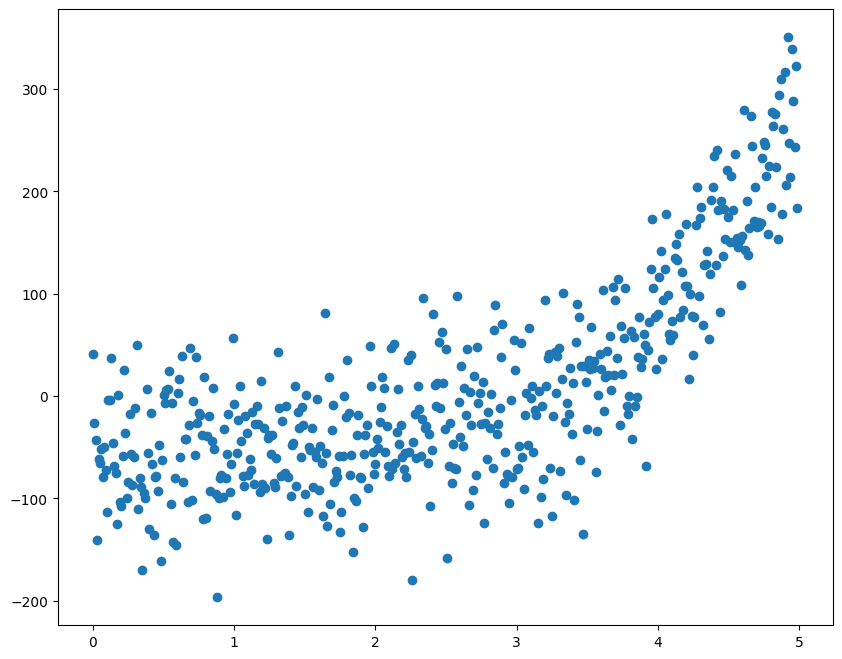

In [ ]:
# S1.1: Visualise relationship between X and y arrays where 'y = f(X) + noise'
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(3)
X = np.arange(0,5,0.01)
Y = 0.5 * (X ** 4) + 2 + (X ** 3) - 4 * (X ** 2) - X - 50
noise = np.random.randn(len(X)) * 50
Y = Y + noise

plt.figure(figsize = (10,8))
plt.scatter(X, Y)
plt.show()

As you can observe, the relationship between `X` and `y` arrays does not appear to be linear, rather it is more curvilinear.

**Note:** Although we are generating random numbers, we will obtain same graph even if we execute the above code multiple times. This is because of `random.seed()` function.

Now consider `X` as feature variable and `y` as target variable and split them into train and test sets using the `train_test_split()` function. Also visualise both train and test set arrays.


Follow the steps given below to create a scatter plot for  train and test sets side by side using the `subplots()` function:

1. Call the `subplots()` function on an object of `matplotlib.pyplot` and unpack the figure and axis objects in two different variables, say `fig` and `axis`. Inside the `subplots()` function, pass:

  - `nrows = 1` and `ncols = 2` parameters to create a figure having 1 row and 2 columns.

  - `figsize = (15, 5)` parameter to create the figure of 15 units wide and 5 units high.

  - `dpi = 96` parameter to further enlarge the figure based on their pixel density.

- Construct a scatter plot to visualise the relation between `X_train` and `y_train` using first subplot's axes i.e `axis[0]` as follows:
   
   `axis[0].scatter(X_train, y_train)`.

- Also call the `set()` function using the `axis[0]` object to set the `title`, `xlabel` and `ylabel` for the first subplot as follows:

    `axis[0].set(title = 'Train Set', xlabel = 'X', ylabel = 'y')`

- Similarly, construct another scatter plot to visualise relation between `X_test` and `y_test` using the second subplot's axes, i.e., `axis[1]`. Also set the `title`, `xlabel` and `ylabel` for the second subplot using the `set()` function.

- Call the `suptitle()` on the figure object to add a centered title to the figure.

- Call the `show()` function on the `matplotlib.pyplot` object.


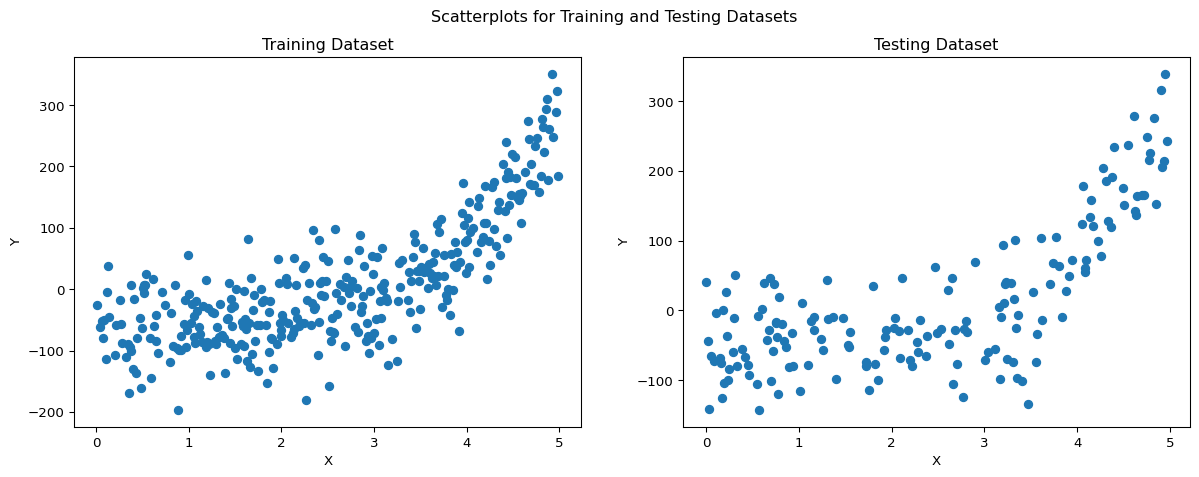

In [ ]:
# S1.2: Split X and y into train and test set and plot them.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)
fig, axis =plt.subplots(nrows = 1, ncols = 2, figsize = (15,5), dpi = 96)

axis[0].scatter(x_train, y_train)
axis[0].set(title = "Training Dataset", xlabel = "X", ylabel = "Y")
axis[1].scatter(x_test, y_test)
axis[1].set(title = "Testing Dataset", xlabel = "X", ylabel = "Y")
fig.suptitle('Scatterplots for Training and Testing Datasets')
plt.show()

You can also create similar subplots by using tuple unpacking for multiple axes.

Examples:

**1. `fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2)`**

Here,
- `ax1` will be used to get an axis at first row, first column.
- `ax2` will be used to get an axis at second row, first column.

**2. `fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2)`**

Here,
- `ax1` will be used to get an axis at first row, first column.
- `ax2` will be used to get an axis at first row, second column.
- `ax3` will be used to get an axis at second row, first column.
- `ax4` will be used to get an axis at second row, second column.

You can visualise `((ax1, ax2), (ax3, ax4))` as

```
[[ax1, ax2],
 [ax3, ax4]]
```


Let us create the scatter plots for train and test sets again using this approach.

In [ ]:
# S1.3: plot train and test set using tuple unpacking


Now let's build and fit a Linear Regression model to this dataset. Also, evaluate the accuracy of this model with $R^2$ score and plot the predicted values for the train set.  

In [ ]:
# S1.4: Create and deploy the Linear Regression model.
# Plot the predicted values and actual values for train set.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
x_train_reshaped = x_train.reshape(-1,1)
x_test_reshaped  = x_test.reshape(-1,1)
lr1 = LinearRegression()
lr1.fit(x_train_reshaped, y_train)
y_train_pred = lr1.predict(x_train_reshaped)


In the above output, you can see that the regression line is fairly far from the dataset. Predictions are in the black straight line and blue points are actual values.

Also the $R^2$ is very low. Thus, such model will probably make a lot of wrong predictions.

Let us predict and plot the values for test set and observe the results.





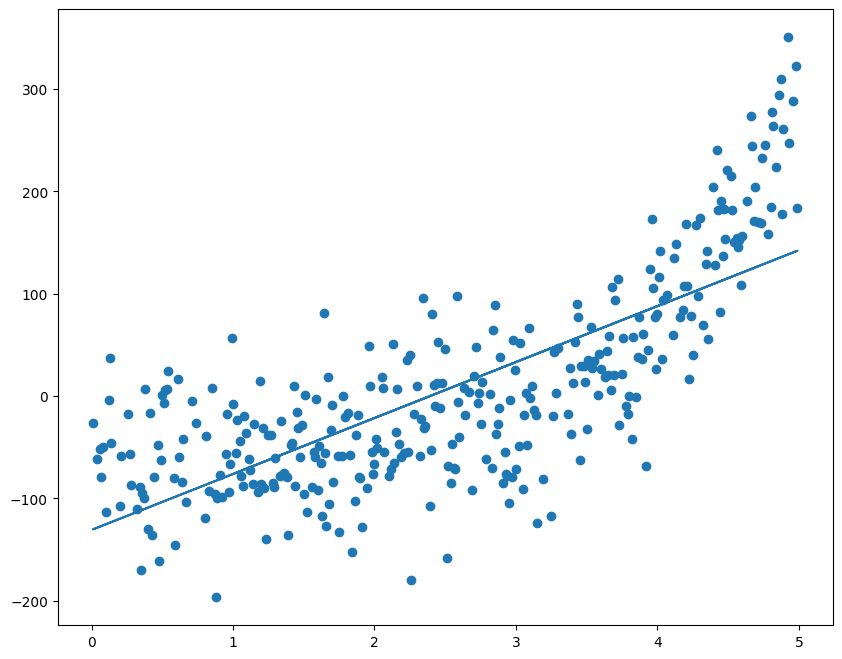

In [ ]:
# S1.5: Predict and plot values for test set
y_test_pred = lr1.predict(x_test_reshaped)
r2_score(y_train, y_train_pred)
r2_score(y_test, y_test_pred)

plt.figure(figsize = (10,8))
plt.plot(x_train, y_train_pred)
plt.scatter(x_train, y_train)
plt.show()

As you can observe, again the linear regression model is not able to fit the test data properly as the line is not capturing the relationship between feature and target arrays.

Also, the $R^2$ score  for test features is also very low. This is an example of underfitting.

We can summarises that the Linear Regression model can only make linear predictions. That means that it is unable to predict the accurate values when the relationship between independent and dependent variables is non-linear.

We can avoid underfitting by:
- Increasing the training time of the model.
- Increasing the number of features to train the model.
- Simply change the algorithm to create the model.

In our case, we will overcome underfitting with the help of Polynomial Regression. Let us first understand what is Polynomial Regression.


----

####Activity 2: Polynomial Regression

Polynomial Regression is also known as an extension of Linear Regression.
It is used to overcome the underfitting problem in Linear Regression.

Let's start with the equation of Linear Regression,

$$Y = \beta_0 + \beta_1 x  \tag{1}$$

where

- $x$  is independent variable or feature.

- $Y$ is the response to the independent variable (or predicted value or dependent variable).

- $\beta_0, \beta_1$ are the corresponding regression coefficients.

The equation $(1)$ is a first order or a first degree polynomial.

In Polynomial Regression, the input $x$ is raised to higher powers to  transform equation $(1)$  into:

$$Y = \beta_0 + \beta_1 x + \beta_2 x^2 +  \beta_3 x^3 + \dots + \beta_n x^n  \tag{2}$$

here,

- $x^2, x^3, \dots, x^n$ are the higher orders of the feature $x$ to transform the linear line into a curve.

For example,

$$Y = \beta_0 + \beta_1 x + \beta_2 x^2  \tag{3}$$

The function $(3)$  is a quadratic or second degree polynomial function. We can extend the function by increasing its degree.

Similarly, we could also use  a third-order or a third-degree polynomial that has the form:
 $$Y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3  \tag{4}$$

The higher the orders get, the more complex curves you can represent.

We can use `PolynomialFeatures` class of the `sklearn.preprocessing` module to convert the independent features into their higher orders.

**Syntax:** `PolynomialFeatures(degree, include_bias)`

  where,
  - `degree`: The degree of the polynomial features and is initialised as `2` by default.

  - `include_bias`: If `True` (default) , then includes a bias column. The bias column is a column in which all the polynomial powers are zero, i.e., a column of ones. This column acts an intercept term in a linear model.

**What is bias?**

While exploring machine learning algorithms, we will often come across the term "bias".

*Bias is how far off the model predictions are from
the correct values. Are they more or less on the right spot? Or are the errors in the prediction consistently skewed in a particular direction?* If yes, then we can say that our predictions are ***biased*** in a certain direction.

Here, bias is a variable whose power is zero.

For example, if there is a single variable $x$ then the possible combinations for $x$ would be:
-  $\{x^0, x^1, x^2\}$  for  degree `2`.
-  $\{x^0, x^1, x^2, x^3\}$ for degree `3`.

Here, $x^0$ i.e. $1$ is called bias. Thus, the `include_bias` attribute allows us to include or exclude this bias in the final higher order feature matrix.

Let's convert the independent variable `X` to its high power values using the `PolynomialFeatures` class.

**Steps:**

1. Create an object of `PolynomialFeatures` class and pass the desired degree as an input to its constructor.  

2. Call the `fit_transform()` function using the object of `PolynomialFeatures` class.

In [ ]:
# S2.1: Convert the 'X_train' feature variable to fit polynomial expression with 'degree = 1'
from sklearn.preprocessing import PolynomialFeatures
pf1 = PolynomialFeatures(degree = 1)
pf1_fitted = pf1.fit_transform(x_train_reshaped)



In [ ]:
pf1_fitted[:5]

array([[1.  , 4.71],
       [1.  , 0.26],
       [1.  , 0.07],
       [1.  , 4.53],
       [1.  , 1.08]])

In [ ]:
print(x_train[:5])

[4.71 0.26 0.07 4.53 1.08]


In the output, we obtained a new matrix having $x^0$ and  $x^1$ features for a 1-degree polynomial. The first column is the bias column and the second column represents the original features since `degree = 1`.

Thus,

- $[x]$ will be transformed into $[1, x]$ for degree `1`.
- $[x]$ will be transformed into $[1, x, x^2]$ for degree `2`.
- $[x]$ will be transformed into $[1, x, x^2, x^3]$ for degree `3`

  and so on.

So let's move ahead and convert the feature variable `X_train` to `degree = 2` polynomial.

**Note:**  As we are using linear regression model after obtaining higher order polynomials, we can keep `include_bias = False`. This is because, the linear regression model by default takes care of adding a column containing 1s, so there is no need to add it again in `PolynomialFeatures` array.

In [ ]:
# S2.2: Convert the 'X_train' feature variable to fit polynomial expression with 'degree = 2'
pf2 = PolynomialFeatures(degree = 2, include_bias = False)
pf2_fitted = pf2.fit_transform(x_train_reshaped)


In [ ]:
pf2_fitted[:5]

array([[4.71000e+00, 2.21841e+01],
       [2.60000e-01, 6.76000e-02],
       [7.00000e-02, 4.90000e-03],
       [4.53000e+00, 2.05209e+01],
       [1.08000e+00, 1.16640e+00]])

**Note:** The bias column i.e. column containing 1s is not displayed in the above matrix as `include_bias` is set to `False`.

The ouput array created with `degree = 2` polynomial object has 2 columns where:
- First column is the original feature.
- Second column is the new high order feature which is the square value of the original feature.

Thus, we obtained all possible combinations of the feature $X$ with `degree = 2` i.e. $[X, X^2]$

We can also verify whether the second column is the square of the first column by calculating their squares using the conventional method.

In [ ]:
# S2.3: Calculate the square of first five 'X_train' values.
x_train[:5] ** 2

array([2.21841e+01, 6.76000e-02, 4.90000e-03, 2.05209e+01, 1.16640e+00])

You may notice that we get the same values as obtained with the `PolynomialFeatures` class. Hence, the expression obtained will be a quadratic function i.e. a polynomial with `degree = 2` as shown below:

$$Y = \beta_0 + \beta_1 x + \beta_2 x^2 $$


Let us now fit a linear regression model on the transformed features and observe the $R^2$ score and the relationship graph.

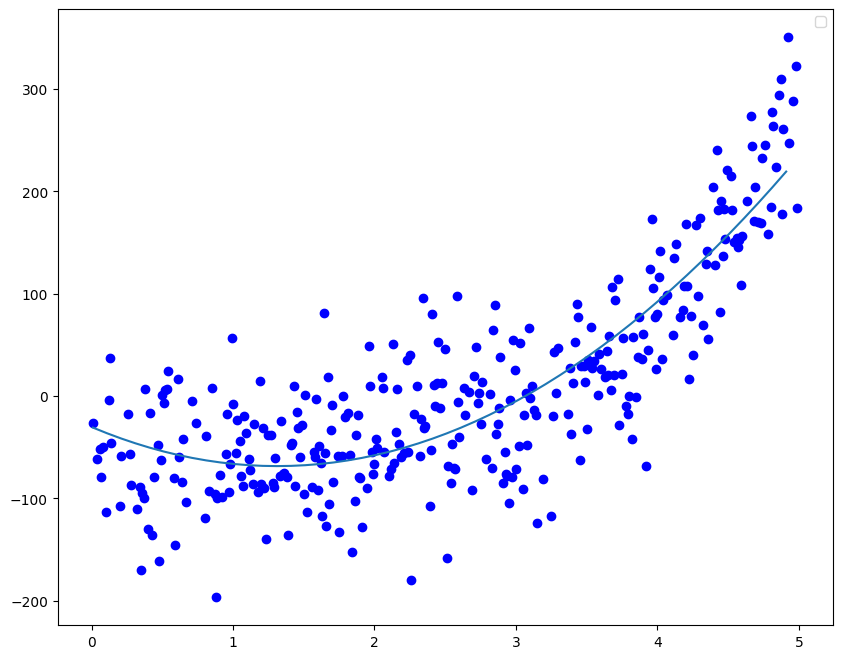

In [ ]:
# S2.4: Create a Linear Regression model with feature values in 'X_train_poly' array to predict 'y_train'
lr3 = LinearRegression()
lr3.fit(pf2_fitted, y_train)
y_train_pred2 = lr3.predict(pf2_fitted)
x_train_grid = np.arange(min(x_train), max(x_train), 0.1)
x_train_grid = x_train_grid.reshape(len(x_train_grid), 1)

r2_score(y_train, y_train_pred2)
r2_score(y_test, y_test_pred)

plt.figure(figsize = (10,8))
plt.scatter(x_train, y_train, color = 'blue')
plt.plot(x_train_grid, lr3.predict(pf2.fit_transform(x_train_grid)))
plt.legend()
plt.show()


It is quite evident from the plot that the quadratic
curve is able to fit the data better than the linear line. Also the $R^2$ score has increased from `0.6470` (linear model) to `0.8343` (second order polynomial model).

Let us also predict the values for test set and plot the predictions using the steps given below:

1. Convert the feature array `X_test` into second order polynomial matrix.
2. Predict the values for the transformed test set  using the linear regression model `poly_model` created and trained in the above code cell.
3. Calculate the $R^2$ score for the test set.
5. Plot the predicted values for the test set.


ValueError: ignored

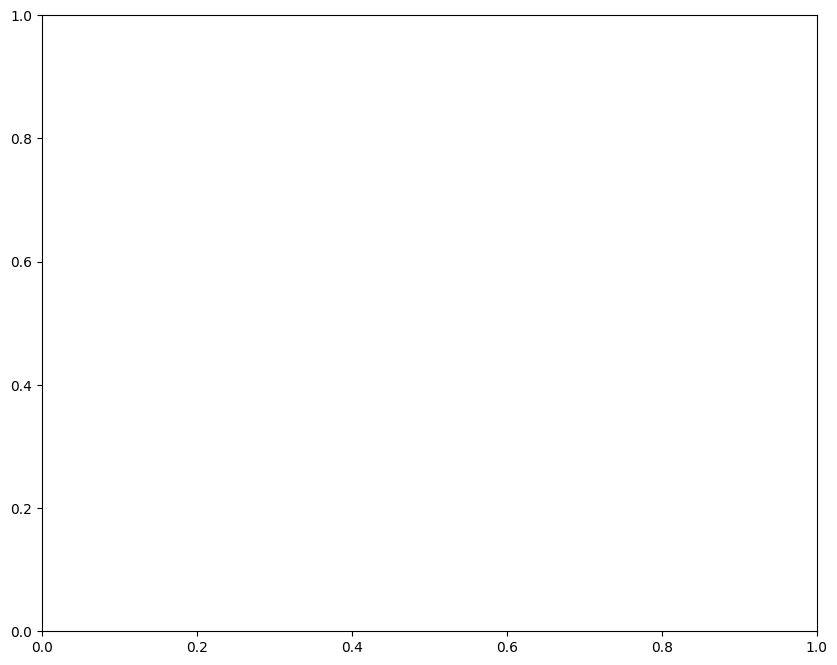

In [ ]:
# S2.5: Transform the test set feature into degree 2 polynomial feature.
# Predict the values for the transformed features and plot the predicted values.
plt.figure(figsize = (10,8))
plt.scatter(x_train_grid2, y_train_pred2, color = 'blue')
plt.legend()
plt.show()

As you can see, the predicted target values for test set are close to the actual target values. Also, the $R^2$ score has improved significantly from `0.6496` to `0.8362` for the test set which shows that second order polynomial model is performing better than the linear model.

Similarly, we can obtain a more accurate model by increasing the degree of polynomial.

Let us define a function `polynomial_regression()` that transforms the original features into polynomial features of desired `degree` and then applies Linear Regression on it. This function should accept `degree` as input.

Perform the following tasks inside `polynomial_regression()` function:

1. Create an object of `PolynomialRegression` class and pass `degree` as input to its constructor.

2. Call the `fit_transform()` function for train set and test set using the object of `PolynomialRegression` class to obtain  polynomial features of the inputted `degree`.

3. Train a linear regression model using the high order polynomial train set.

4. Predict the values for the transformed train and test sets  using the linear regression model created.

5. Calculate and print the $R^2$ score for both train and test set.

6. Plot the predicted values for the train and test set within one figure using the `subplot()` function.

In [ ]:
# S2.6: Create a function that accepts degree as input and plots the predictions for high order polynomials.
# S2.6: Create a function that accepts degree as input and plots the predictions for high order polynomials.
def polynomial_regression(degree):
  # Obtain high order polynomial feature for train and test set.
  poly_features = PolynomialFeatures(degree = degree, include_bias = False)

  X_train_poly = poly_features.fit_transform(x_train_reshaped)
  X_test_poly = poly_features.fit_transform(x_test_reshaped)

  # Fit the linear regression using high order train set features.
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, y_train)

  # Make predictions for train and test set.
  y_train_predict = poly_model.predict(X_train_poly)
  y_test_predict = poly_model.predict(X_test_poly)

  # Calculate and print R-squared score for train and test set.
  r2_train = r2_score(y_train, y_train_predict)
  r2_test = r2_score(y_test, y_test_predict)

  print(f"R-squared score of training set for degree {degree}: {r2_train:.4f}")
  print(f"R-squared score of test set for degree {degree}: {r2_test:.4f}")

  # plot the predictions for train and test set using subplots.
  X_train_grid = np.arange(min(x_train), max(x_train), 0.1)
  X_train_grid = X_train_grid.reshape(len(X_train_grid), 1)

  X_test_grid = np.arange(min(x_test), max(x_test), 0.1)
  X_test_grid = X_test_grid.reshape(len(X_test_grid), 1)

  # plot train and test set using subplots
  fig, (ax1, ax2)= plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5), dpi = 96)

  ax1.set(title = 'Train Set', xlabel = 'X', ylabel = 'y')
  ax1.scatter(x_train, y_train, label = f"Original train set data points", color = "b")
  ax1.plot(x_train_grid, poly_model.predict(poly_features.fit_transform(x_train_grid)),
           label = f"Degree = {degree}", color = "black" , linestyle = '--'
           )
  ax1.scatter(x_train, y_train_predict , label = f"Predicted values", color = "r")
  ax1.legend()

  ax2.set(title = 'Test Set', xlabel = 'X', ylabel = 'y')
  ax2.scatter(x_test, y_test)
  ax2.plot(X_test_grid, poly_model.predict(poly_features.fit_transform(X_test_grid)),
           label = f"Degree = {degree}", color = "black" , linestyle = '--'
           )
  ax2.scatter(x_test, y_test_predict , label = f"Predicted values", color = "r")
  ax2.legend()

  fig.suptitle('Predictions for Train set and Test set')
  plt.show()

Now that we have created the `polynomial_regression()` function, it will be very convenient for us to visualise the polynomial regression model for any desired degree.

Let us visualise the third order polynomial regression model by passing `3` as input to the `polynomial_regression()` function.

R-squared score of training set for degree 2: 0.7258
R-squared score of test set for degree 2: 0.7157


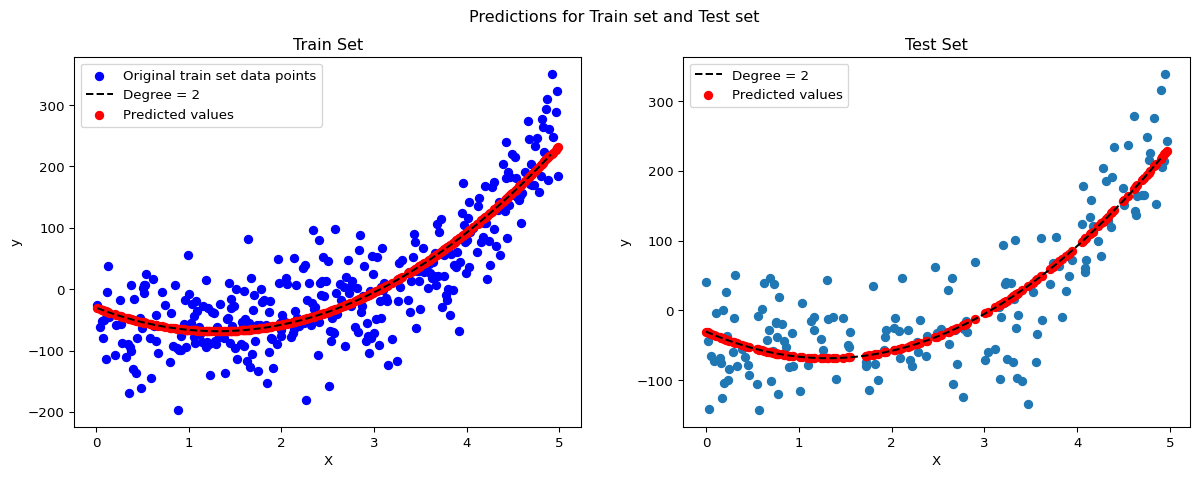

In [ ]:
# S2.7: Call the 'polynomial_regression()' function and pass 3 as input.
polynomial_regression(2)

You may notice that we obtained a more accurate model for third degree polynomial, as the $R^2$ score is better than the second order polynomial model for the test set.


Similarly, visualise the regression curve for 4 and 5-degree polynomial regression model by passing `4` and `5` as inputs to the `polynomial_regression()` function.

R-squared score of training set for degree 4: 0.7515
R-squared score of test set for degree 4: 0.7366


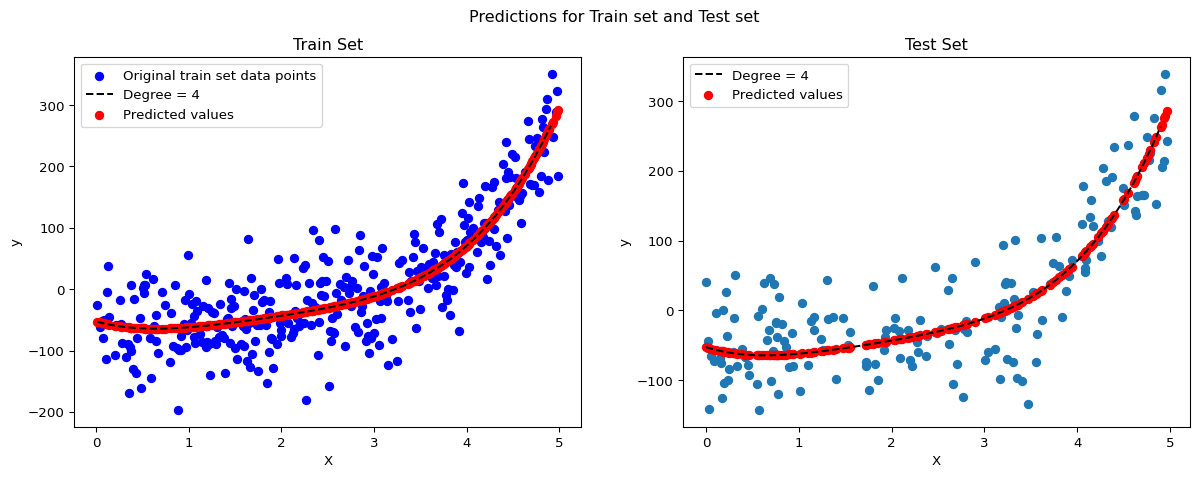

R-squared score of training set for degree 5: 0.7518
R-squared score of test set for degree 5: 0.7377


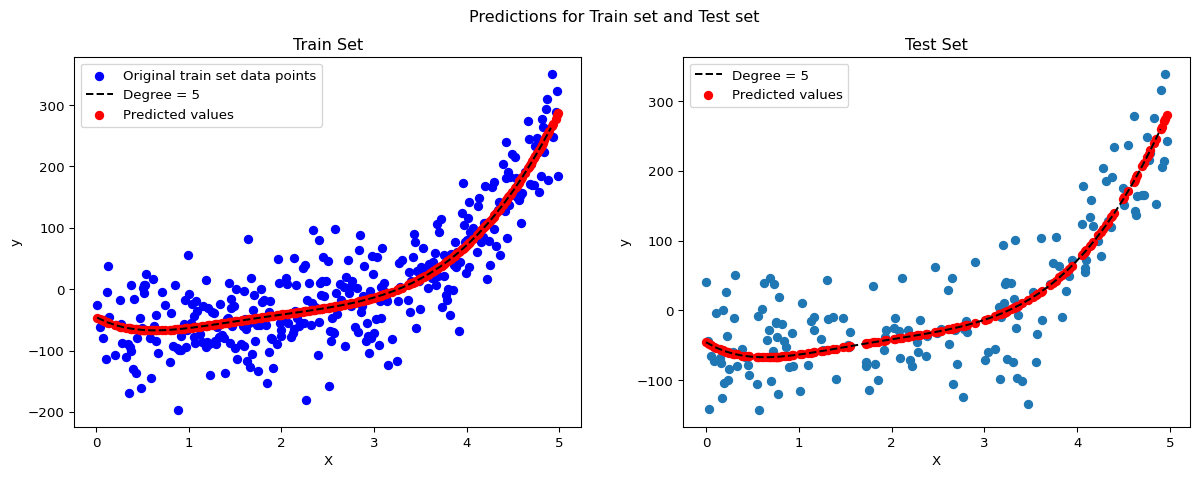

R-squared score of training set for degree 15: 0.7591
R-squared score of test set for degree 15: 0.7392


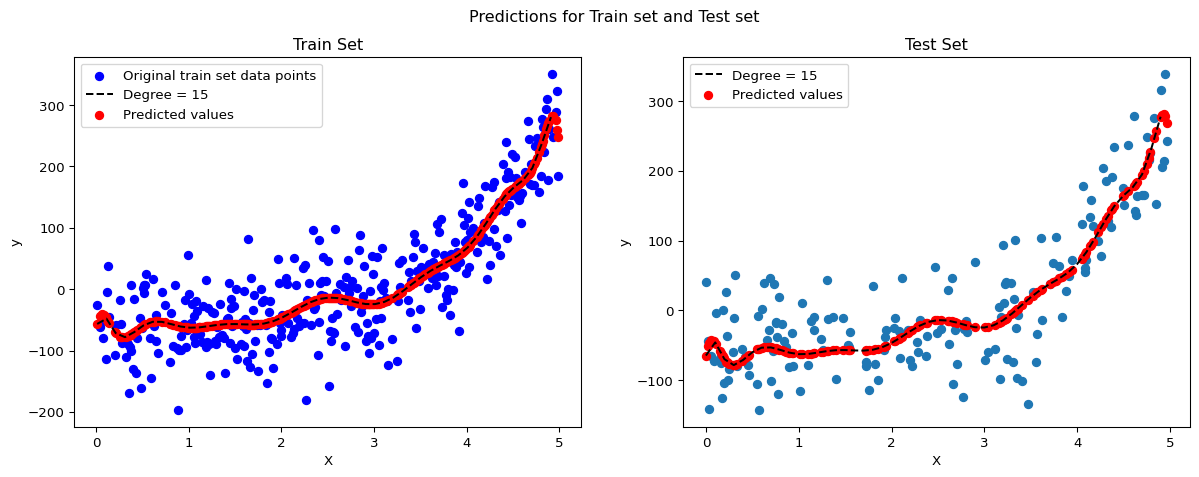

R-squared score of training set for degree 16: 0.7591
R-squared score of test set for degree 16: 0.7406


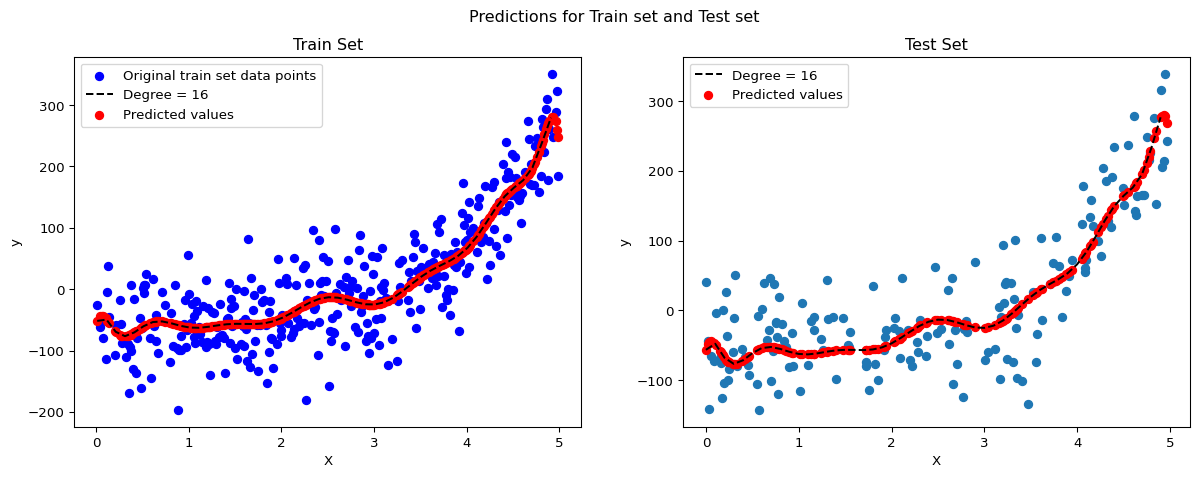

In [ ]:
# S2.8: Visualise the poylnomial model for degree 4 and 5.
polynomial_regression(4)
polynomial_regression(5)
polynomial_regression(15)
polynomial_regression(16)

1In this way, as we move ahead and increase the degree of the polynomial we will be able to detect the exact trend or pattern in the original data with the help of Polynomial Regression.

But wait, do we want the model to detect the exact trend or pattern in the original data? The answer is no. It can cause **Overfitting**.

Let's stop here. We will learn overfitting in the next class.

---